# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm that is typically used for clustering tasks. 
It was proposed by `Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu in 1996`.

## **Key Concepts of DBSCAN**

**`Density:`** In the context of DBSCAN, density is defined as the number of points within a specified radius (ϵ).

**`Direct Density Reachable:`** A point A is directly density reachable from a point B if A is within the ϵ distance from B and B has sufficient number of points in its neighbors which is more than a certain threshold points (MinPts).

**`Density Reachable:`** A point A is density reachable from a point B if there is a sequence of points P1, P2,...,Pn, P1 = B, Pn = A such that Pi+1 is directly density reachable from Pi.

**`Density Connected:`** A point A is density connected to a point B if there is a point C such that both A and B are density reachable from C.


## **Steps of the DBSCAN Algorithm**

### **Step 1:**
The algorithm starts with an arbitrary starting point that has not been visited. The neighborhood of this point is extracted using a `distance ϵ (eps)` and if it contains sufficiently `many points (MinPts)`, a new cluster is started.

### **Step 2:**
The algorithm then iteratively continues, considering each point within the neighborhood (starting with the original point), and if this point also has a sufficient number of points within its neighborhood, the cluster is expanded to include this point and its neighborhood points. If the point does not have a sufficient number of points within its neighborhood, `the point is labeled as noise (it does not belong to any cluster)`.

### **Step 3:**
The process continues until the density-connected cluster is completely found. The algorithm then proceeds to the next unvisited point in the database and repeats the process until all points have been visited, resulting in a complete segmentation of the data into clusters, with outliers marked as noise.

### **Advantages of DBSCAN**

* It can find arbitrary shaped clusters. It can even find a cluster completely surrounded by a different cluster.
* It has a notion of noise, and is robust to outliers.
* It does not require one to specify the number of clusters such as in k-means.
* It performs well with large datasets.

### **Disadvantages of DBSCAN**

* It is not entirely deterministic: border points that are reachable from two clusters can be part of either cluster, depending on the order the data is processed.
* It has trouble finding clusters of varying density.
* It is sensitive to the parameters, and it's not always easy to choose an appropriate value for **`ϵ and MinPts`**.


# **Paramters**

**DBSCAN works on the principle of density connectivity. It uses two parameters:**

**`ε (eps):`** This is the distance threshold within which to search for nearby neighbors.

**`MinPts:`** This is the minimum number of data points needed to form a dense region.

The algorithm starts by picking an arbitrary point in the dataset. If there are at least MinPts within a radius of ε from that point, a new cluster is created, and the point is marked as a core point. Points within the ε radius are added to the cluster. For each point within the ε radius, if there are MinPts within a radius of ε from that point, those points are also added to the cluster. This process continues until there are no more points within the ε radius. The algorithm then proceeds with the next arbitrary unvisited point.

**The DBSCAN algorithm classifies data points into three categories:**

**`Core points:`** A point is a core point if there are at least MinPts within ε distance from this point.

**`Border points:`** A point is a border point if it is reachable from a core point and there are less than MinPts within ε distance from this point.

**`Noise or outlier points:`** A point is an outlier if it is neither a core point nor a border point.


## **Points:**

1. **`Core points:`** A point is a core point if there are at least MinPts within ε distance from this point.
2. **`Border points:`** A point is a border point if it is reachable from a core point and there are less than MinPts within ε distance from this point.
3. **`Noise or outlier points:`** A point is an outlier if it is neither a core point nor a border point.



<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*jMhXpsJCe7ZEj0KB.png" alt="gassian distribution" width="50%">



For locating data points in space, DBSCAN uses `Euclidean distance`, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.


### DBSCAN Example

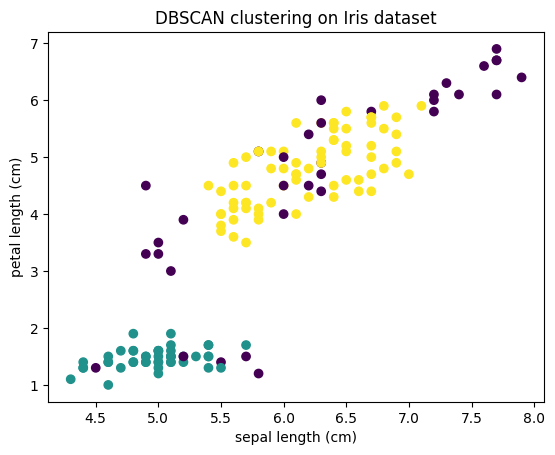

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load the dataset
iris = load_iris()
X = iris.data

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# fit the model
dbscan.fit(X_scaled)

# plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN clustering on Iris dataset')
plt.show()

---

## DBSCAN vs OPTICS Clustering: 


`DBSCAN and OPTICS` are both density-based clustering algorithms that group together data points that are close to each other in the feature space. 
However, there are some differences between the two algorithms in terms of performance and scalability:

>**DBSCAN:**

* Estimates the density by counting the number of points in a fixed-radius neighborhood or Eps and deems that two points are connected only if they lie within each other's neighborhood.
* Uses two parameters such as Eps and MinPts. Eps denotes the Eps-neighborhood of a point and MinPts denotes the minimum number of points required to form a dense region.
* Can find arbitrary shaped clusters using MinPts parameters.
* The order of the point in the database is insensitive.
* Handles noise and outliers.
* Cannot perform well with large differences in densities.
* Requires less memory than OPTICS.

>**OPTICS:** Ordering Points To Identify the Clustering Structure (OPTICS)

* Works like an extension of DBSCAN but does not assign cluster memberships but stores the order in which points are processed.
* Generates an enhanced order of the data collection structure.
* Can extract clusters of varying densities and shapes.
* Does not require to set the number of clusters in advance, instead, it extracts the clustering structure of the data and produces the reachability plot. This allows the user to have more flexibility in selecting the number of clusters.
* Requires more memory than DBSCAN as it maintains a priority queue (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance.
* Requires more computational power because the nearest neighbor queries are more complicated than radius queries in DBSCAN.
* In summary, DBSCAN is a good choice for datasets with arbitrary shaped clusters and handles noise and outliers well. On the other hand, OPTICS is more flexible in selecting the number of clusters and can extract clusters of varying densities and shapes. However, it requires more memory and computational power than DBSCAN.

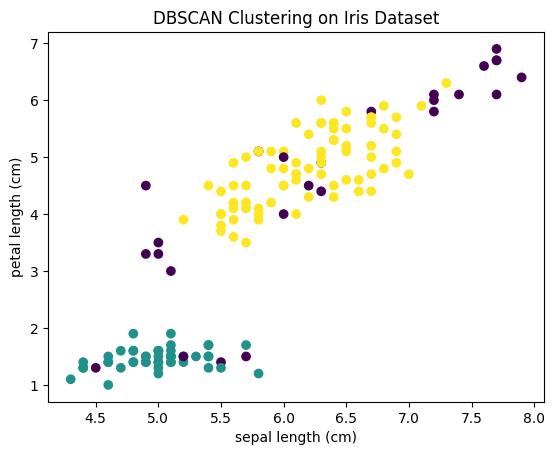

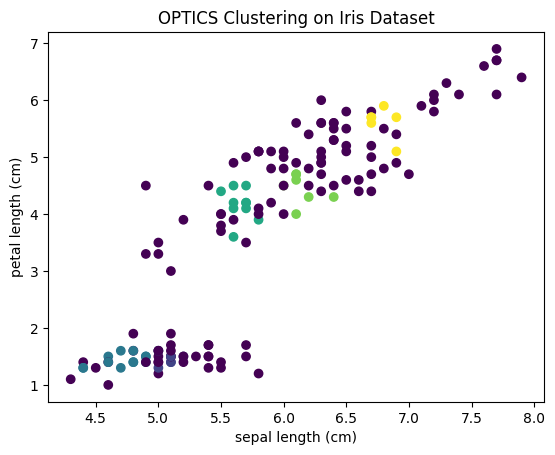

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the DBSCAN object
dbscan = DBSCAN(eps=0.6, min_samples=5)

# Create the OPTICS object
optics = OPTICS(min_samples=5, xi=0.05)

# Fit the models
dbscan.fit(X_scaled)
optics.fit(X_scaled)

# Plot the data points with color-coded clusters for DBSCAN
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

# Plot the data points with color-coded clusters for OPTICS
plt.scatter(X[:, 0], X[:, 2], c=optics.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("OPTICS Clustering on Iris Dataset")
plt.show()


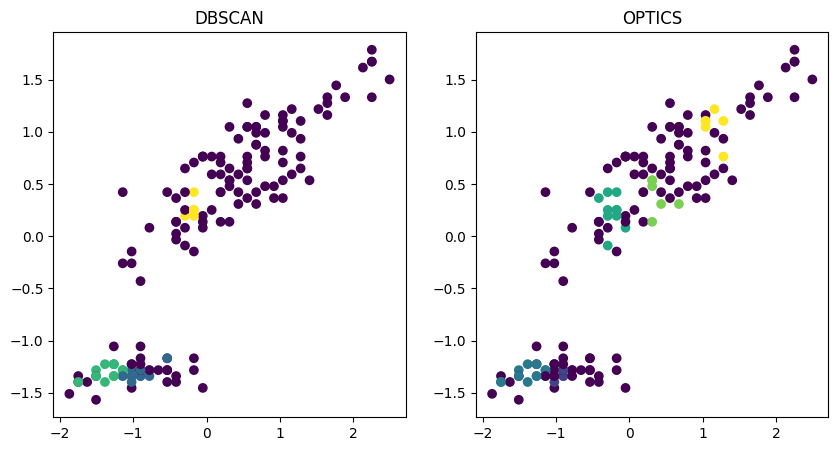

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
df = sns.load_dataset('iris')

# Selecting features to perform clustering
# Here, we'll use all four features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Normalize the features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply OPTICS
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# DBSCAN plot
# For visualization purpose, let's use first two features (sepal_length and sepal_width)
ax[0].scatter(X[:, 0], X[:, 2], c=dbscan_labels, cmap='viridis')
ax[0].set_title('DBSCAN')

# OPTICS plot
# For visualization purpose, let's use first two features (sepal_length and sepal_width)
ax[1].scatter(X[:, 0], X[:, 2], c=optics_labels, cmap='viridis')
ax[1].set_title('OPTICS')

plt.show()


# Hyperparameters for DBSCAN

A `k-distance plot`, also known as a k-distance graph, is a useful tool for determining the appropriate `epsilon` value when using the DBSCAN algorithm. The idea behind a k-distance plot is to plot the distance to the kth nearest neighbor for each point, sort the distances, and then look for the "elbow" or "knee" in the plot. The value of epsilon can be chosen as the y-coordinate of this `"elbow"` point.

Text(0, 0.5, '2nd nearest neighbors distance')

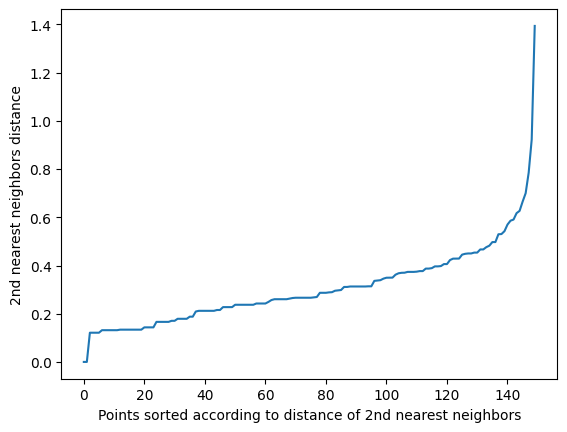

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# load the iris dataset
df = sns.load_dataset('iris')

# normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(features)
distances, indics = nbrs.kneighbors(features)

# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plot thr k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbors')
plt.ylabel('2nd nearest neighbors distance')

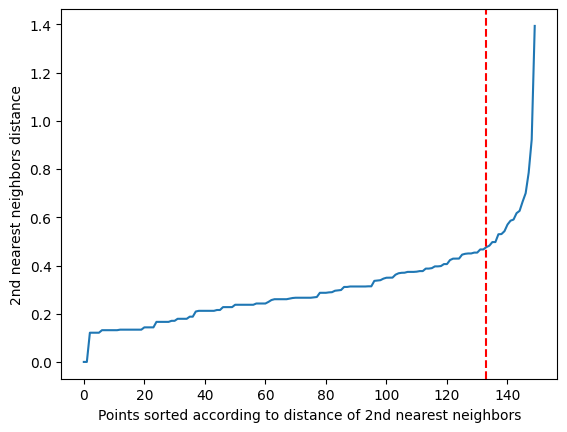

Suggested value of eps: 0.4760712736677158


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# load the iris dataset
df = sns.load_dataset('iris')

# normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(features)
distances, indics = nbrs.kneighbors(features)

# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Identify the 'elbow' in the k-distance plot
kneedle = KneeLocator(range(1, len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow

# plot thr k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbors')
plt.ylabel('2nd nearest neighbors distance')

# add a vertical line to the 'elbow' points
plt.axvline(x=elbow_index, color='r', linestyle='--')
plt.show()

# print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])

# **How to find the best num of MinPts**

The choice of minPts parameter in DBSCAN is less critical compared to eps but it also affects the results of DBSCAN. The minPts parameter specifies the minimum number of points required to form a dense region (or a cluster).

A common heuristic for selecting minPts in DBSCAN is to set it to 2*dim, where dim is the dimensionality of your dataset. For example, if you're clustering data with 4 features (like in the iris dataset), you could start with minPts = 2*4 = 8.

While this heuristic can provide a good starting point, it might not always result in the best performance. In practice, you might want to experiment with different values for minPts and evaluate the results.

Remember, a larger value of minPts means that more points will be required to form a cluster, which makes the algorithm more conservative and clusters will be less likely to be formed. Conversely, a smaller value of minPts means that less points are required to form a cluster, which makes the algorithm more liberal and more clusters will be formed.

In the end, the choice of minPts (as well as eps) should be driven by your specific application, the data characteristics, and the desired outcomes of the clustering process. You can also use evaluation metrics (like silhouette score, Davies-Bouldin index etc.) to guide your choice of these parameters.

### Coding methods: 
One simple method is to use a grid search to experiment with different values of minPts and evaluate the results using a suitable clustering evaluation metric, like the Silhouette score, Davies-Bouldin index or the Calinski-Harabasz index.

Here is an example using the Iris dataset and the Silhouette score:

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Use the previously calculated 'eps' (from the k-distance plot)
eps = 0.5  # Replace with your calculated value

# Define the range for 'minPts'
minPts_range = range(2, 11)

# Initialize the variables to store the best 'minPts' and the corresponding silhouette score
best_minPts = -1
best_silhouette = -float('inf')

# Grid search over the 'minPts' range
for minPts in minPts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(features)
    
    # Ignore execution if no clusters were found
    if len(np.unique(labels)) < 2 or (labels == -1).all():
        continue

    silhouette = silhouette_score(features, labels)
    print(f'minPts: {minPts}, silhouette score: {silhouette}')

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_minPts = minPts

print(f'Best minPts: {best_minPts}, silhouette score: {best_silhouette}')


minPts: 2, silhouette score: 0.1150059338947623
minPts: 3, silhouette score: 0.15971036873870176
minPts: 4, silhouette score: 0.36457435678297534
minPts: 5, silhouette score: 0.35651648142700726
minPts: 6, silhouette score: 0.1958665929942779
minPts: 7, silhouette score: 0.1391483140504277
minPts: 8, silhouette score: 0.18821743063720223
minPts: 9, silhouette score: 0.06932089894577982
minPts: 10, silhouette score: 0.009426257445526207
Best minPts: 4, silhouette score: 0.36457435678297534
